# Basic Modeling without Feature Selection

In [21]:
import pandas as pd
import numpy as np

In [22]:
data  = pd.read_csv('My-Data.csv')

X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = pd.DataFrame(y)

Epoch 1/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0596 - mean_absolute_error: 0.1718 - mean_squared_error: 0.0596 - val_loss: 0.0134 - val_mean_absolute_error: 0.0877 - val_mean_squared_error: 0.0134
Epoch 2/100
204/204 [==============================] - 0s 2ms/step - loss: 0.0096 - mean_absolute_error: 0.0755 - mean_squared_error: 0.0096 - val_loss: 0.0067 - val_mean_absolute_error: 0.0622 - val_mean_squared_error: 0.0067
Epoch 3/100
204/204 [==============================] - 0s 2ms/step - loss: 0.0052 - mean_absolute_error: 0.0560 - mean_squared_error: 0.0052 - val_loss: 0.0044 - val_mean_absolute_error: 0.0515 - val_mean_squared_error: 0.0044
Epoch 4/100
204/204 [==============================] - 0s 2ms/step - loss: 0.0033 - mean_absolute_error: 0.0447 - mean_squared_error: 0.0033 - val_loss: 0.0033 - val_mean_absolute_error: 0.0427 - val_mean_squared_error: 0.0033
Epoch 5/100
204/204 [==============================] - 0s 2ms/step - loss: 0.0025 - mean_abs

Epoch 69/100
204/204 [==============================] - 0s 2ms/step - loss: 3.5331e-04 - mean_absolute_error: 0.0147 - mean_squared_error: 3.5331e-04 - val_loss: 5.2999e-04 - val_mean_absolute_error: 0.0180 - val_mean_squared_error: 5.2999e-04
Epoch 70/100
204/204 [==============================] - 0s 2ms/step - loss: 3.3714e-04 - mean_absolute_error: 0.0141 - mean_squared_error: 3.3714e-04 - val_loss: 3.8239e-04 - val_mean_absolute_error: 0.0150 - val_mean_squared_error: 3.8239e-04
Epoch 71/100
204/204 [==============================] - 0s 2ms/step - loss: 3.3199e-04 - mean_absolute_error: 0.0139 - mean_squared_error: 3.3199e-04 - val_loss: 2.9206e-04 - val_mean_absolute_error: 0.0138 - val_mean_squared_error: 2.9206e-04
Epoch 72/100
204/204 [==============================] - 0s 2ms/step - loss: 3.2155e-04 - mean_absolute_error: 0.0139 - mean_squared_error: 3.2155e-04 - val_loss: 4.4257e-04 - val_mean_absolute_error: 0.0161 - val_mean_squared_error: 4.4257e-04
Epoch 73/100
204/204 [==

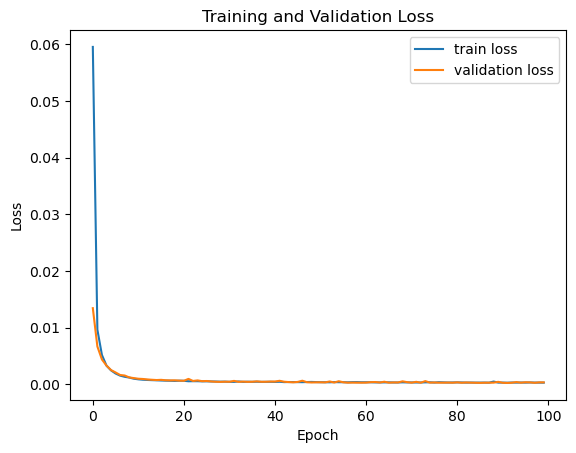

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset
df = pd.read_csv("My-Data.csv")

# Assuming the last column is the target variable
X = df.values
X_t, y_t = X[:, :-1], X[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)  # Regression task with single output node
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=4, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, mae, mse = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Mean Squared Error: {mse:.2f}")

# Plot training history
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 241 (964.00 Byte)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
import numpy as np
from tabulate import tabulate
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_train = r2_score(y_train, model(X_train_scaled).numpy())
r2_test = r2_score(y_test, model(X_test_scaled).numpy())
# print(r2_train)
# print(r2_test)

mse_train = mean_squared_error(y_train, model(X_train_scaled).numpy())
mse_test = mean_squared_error(y_test, model(X_test_scaled).numpy())
# print(mse_train)
# print(mse_test)

mae_train = mean_absolute_error(y_train, model(X_train_scaled).numpy())
mae_test = mean_absolute_error(y_test, model(X_test_scaled).numpy())
# print(mae_train)
# print(mae_test)

rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)
# print(rmse_train)
# print(rmse_test)

# Create a table with the results using tabulate
results = [
    ["Metric", "Train", "Test"],
    ["R²", r2_train, r2_test],
    ["Mean Squared Error (MSE)", mse_train, mse_test],
    ["Mean Absolute Error (MAE)", mae_train, mae_test],
    ["Root Mean Squared Error (RMSE)", rmse_train, rmse_test]
]

# Print the formatted results using tabulate
print(tabulate(results, headers="firstrow", tablefmt="fancy_grid"))


╒════════════════════════════════╤═════════════╤═════════════╕
│ Metric                         │       Train │        Test │
╞════════════════════════════════╪═════════════╪═════════════╡
│ R²                             │ 0.895072    │ 0.886756    │
├────────────────────────────────┼─────────────┼─────────────┤
│ Mean Squared Error (MSE)       │ 0.000316709 │ 0.000402793 │
├────────────────────────────────┼─────────────┼─────────────┤
│ Mean Absolute Error (MAE)      │ 0.0140709   │ 0.0156012   │
├────────────────────────────────┼─────────────┼─────────────┤
│ Root Mean Squared Error (RMSE) │ 0.0177963   │ 0.0200697   │
╘════════════════════════════════╧═════════════╧═════════════╛


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, mean_squared_error
import random
from sklearn.compose import TransformedTargetRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
import timeit
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=RANDOM_SEED)

def get_models():
    models = dict()
    models["Linear Regression"] = LinearRegression()
    models["SVR"] = SVR()
    models["Random Forest"] = RandomForestRegressor(random_state=RANDOM_SEED)
    models["LightGBM"] = LGBMRegressor()
    return models

models = get_models()

scoring = {
    'r2': 'r2',
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'neg_mean_squared_error': 'neg_mean_squared_error',
}

results = pd.DataFrame(index=["R2", "MAE", "MSE", "RMSE", "Time"])

data = pd.read_csv('My-Data.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

for model_name, model in models.items():
    now = timeit.default_timer()
    model = TransformedTargetRegressor(Pipeline([("s", StandardScaler()), ("m", model)]), transformer=StandardScaler())
    cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    end = timeit.default_timer()
    duration = end - now
    avg_scores = {
        "R2": np.mean(cv_results['test_r2']),
        "MAE": -np.mean(cv_results['test_neg_mean_absolute_error']),
        "MSE": -np.mean(cv_results['test_neg_mean_squared_error']),
        "RMSE": np.sqrt(-np.mean(cv_results['test_neg_mean_squared_error'])),
        "Time": duration
    }
    results[model_name] = avg_scores.values()

# Print the results DataFrame
formatted_results = results.copy()

# Format R2 and Time columns to 2 decimal places
formatted_results.loc["R2"] = formatted_results.loc["R2"].apply(lambda x: f"{x:.4f}")
formatted_results.loc["Time"] = formatted_results.loc["Time"].apply(lambda x: f"{x:.4f} s")

# Format MAE, MSE, and RMSE columns to 2 decimal places and add thousands separators
for metric in ["MAE", "MSE", "RMSE"]:
    formatted_results.loc[metric] = formatted_results.loc[metric].apply(lambda x: f"{x:.4f}")
    formatted_results.loc[metric] = formatted_results.loc[metric].str.replace('.', ',')

# Print the formatted results DataFrame using tabulate
print(tabulate(formatted_results, headers='keys', tablefmt='fancy_grid'))
# print(results)


╒══════╤═════════════════════╤══════════╤═════════════════╤════════════╕
│      │ Linear Regression   │ SVR      │ Random Forest   │ LightGBM   │
╞══════╪═════════════════════╪══════════╪═════════════════╪════════════╡
│ R2   │ 0.6434              │ 0.9111   │ 0.9418          │ 0.9343     │
├──────┼─────────────────────┼──────────┼─────────────────┼────────────┤
│ MAE  │ 0,0262              │ 0,0124   │ 0,0091          │ 0,0099     │
├──────┼─────────────────────┼──────────┼─────────────────┼────────────┤
│ MSE  │ 0,0011              │ 0,0003   │ 0,0002          │ 0,0002     │
├──────┼─────────────────────┼──────────┼─────────────────┼────────────┤
│ RMSE │ 0,0333              │ 0,0166   │ 0,0134          │ 0,0142     │
├──────┼─────────────────────┼──────────┼─────────────────┼────────────┤
│ Time │ 0.0558 s            │ 0.2523 s │ 1.6436 s        │ 0.5647 s   │
╘══════╧═════════════════════╧══════════╧═════════════════╧════════════╛


In [3]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import random
from sklearn.compose import TransformedTargetRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
import timeit

RANDOM_SEED = 42
random.seed(RANDOM_SEED) 

cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=RANDOM_SEED)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

data = pd.read_csv('My-Data.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Fit the random search model
rf_random.fit(X, y);
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}